In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# For learning purposes we will drop the id from the table

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Now let's test for the missing values, as it appears that BMI is likely lacking them

In [11]:
print ("Rows: " , df.shape[0])
print ("Columns: " , df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows:  5110
Columns:  11

Missing values :   201

Unique values :  
 gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


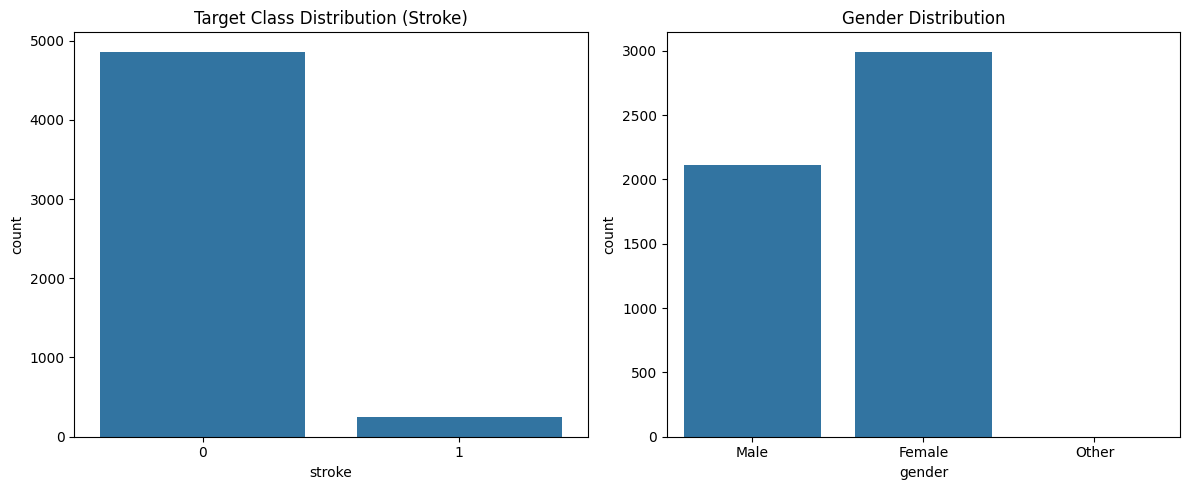

In [28]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


sns.countplot(x='stroke', data=df, ax=axes[0])
axes[0].set_title("Target Class Distribution (Stroke)")

sns.countplot(x='gender', data=df, ax=axes[1])
axes[1].set_title("Gender Distribution")

plt.tight_layout()
plt.show()

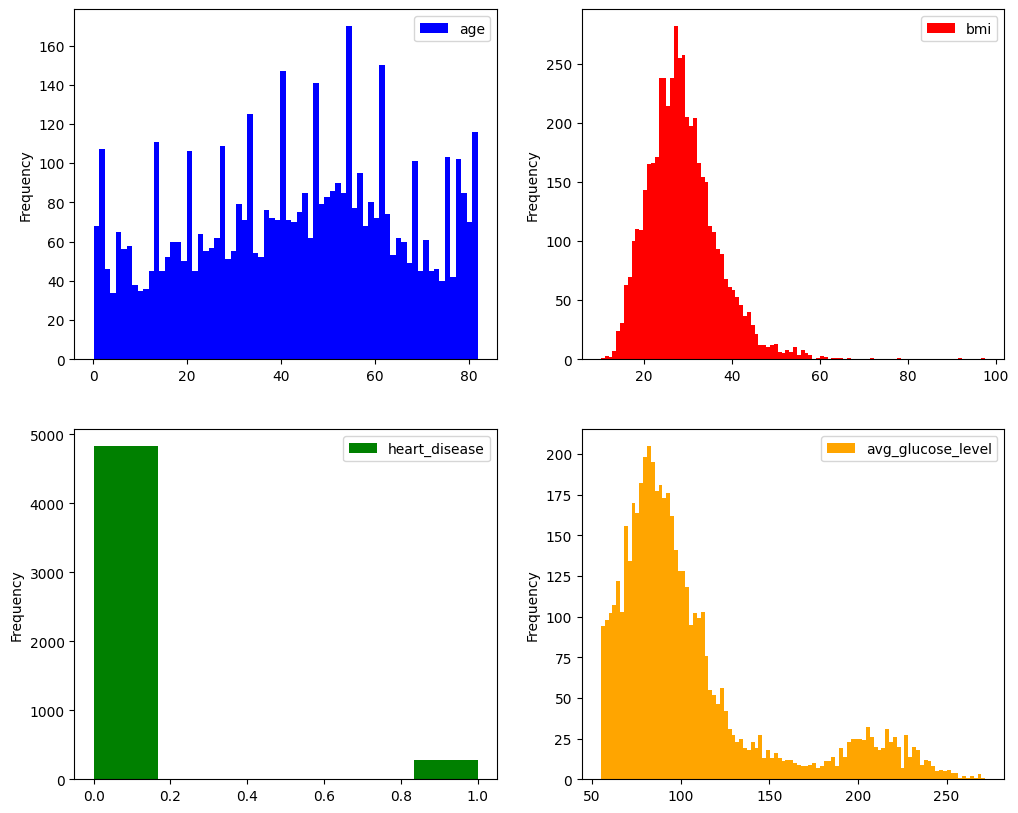

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])

plt.show()

We have a good age distribution. I think we have disparities in BMI. The average glucose distribution is acceptable, as the normal average blood sugar level is less than 140, which may not be good; this feature will not be useful for determining the correlation between diabetes and strokes.

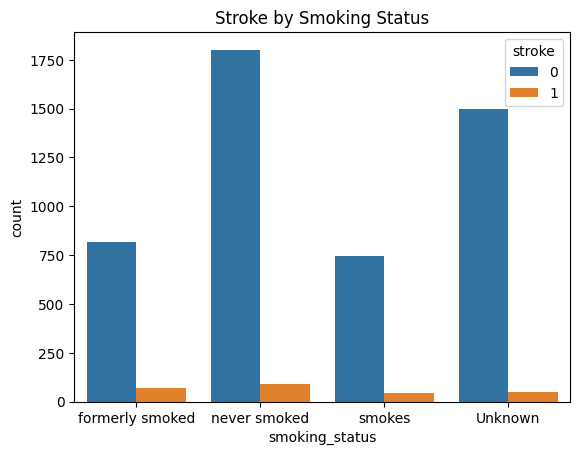

In [32]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke by Smoking Status')
plt.show()

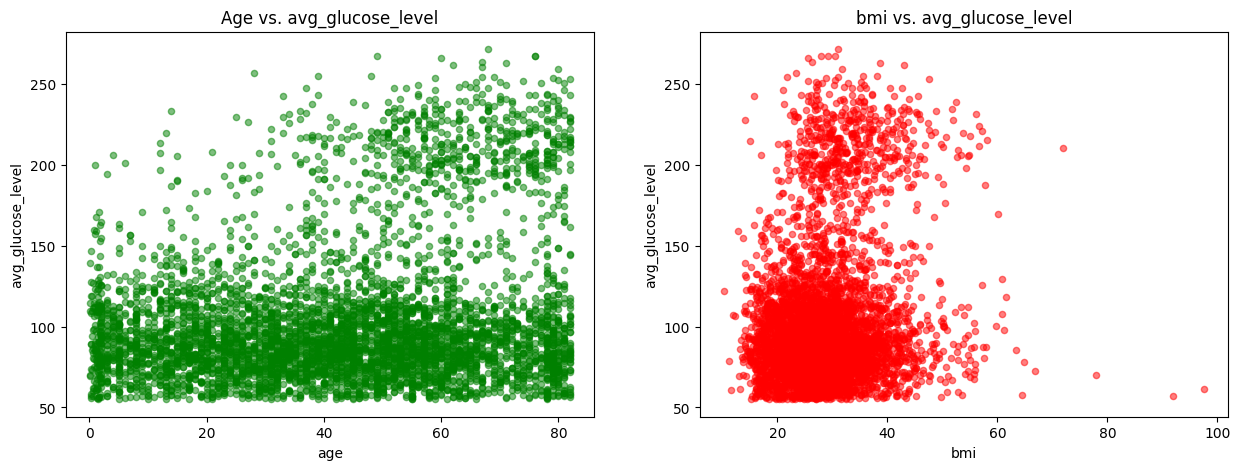

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

- The average glucose level is high in elderly people.
- BMI >40 has a low average glucose level.

The correlation matrix will show us if the data about BMI could be effective in decision making

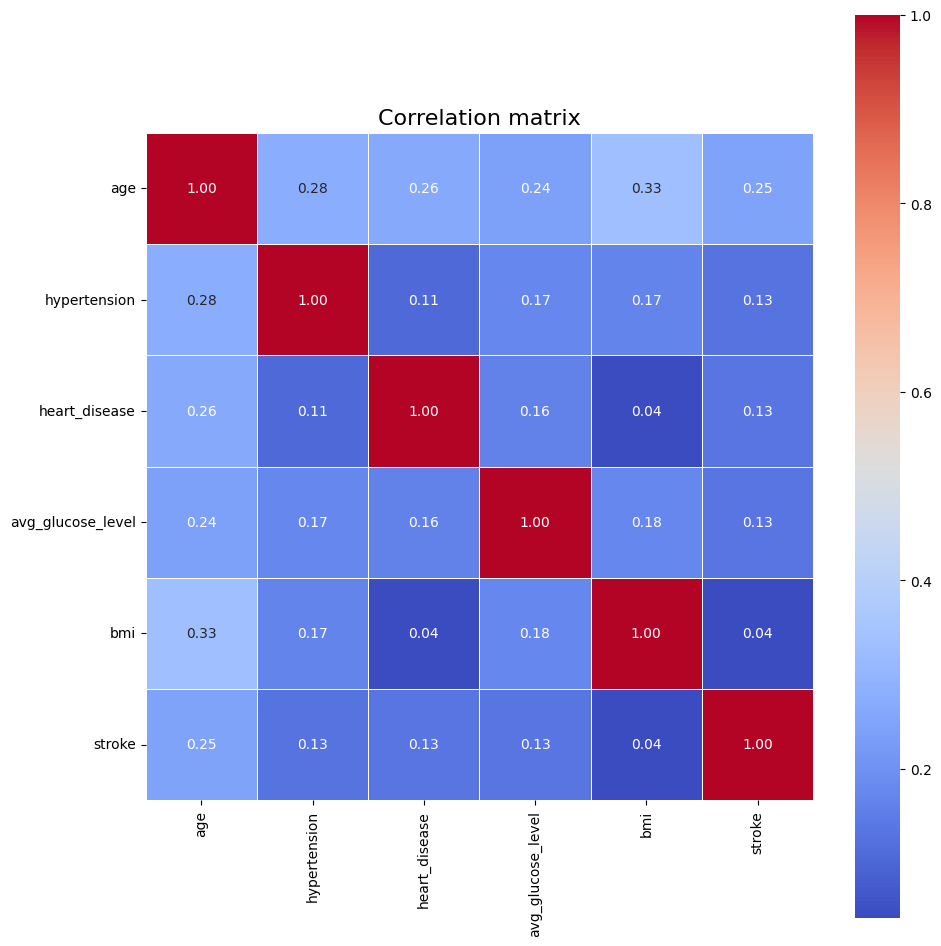

In [31]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(),
            annot=True,
            square=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f")
plt.title("Correlation matrix", fontsize=16)
plt.tight_layout()
plt.show()

We can see that BMI doesn"t really influence the Stroke, however age is one of the most deciding points, followed by previous heart deseases and glucose level.

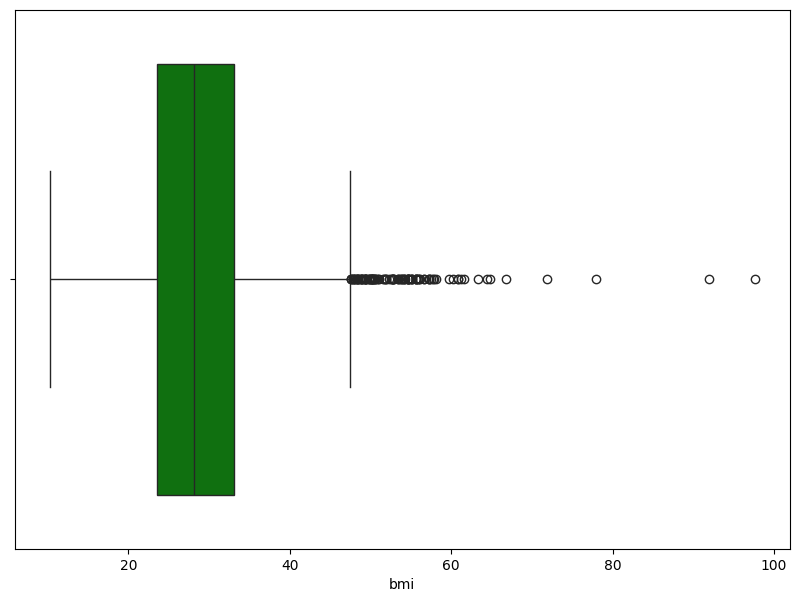

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

The maximum BMI for class III obesity is 49.9, so let's check how many values exceed 50, and how many of them had a stroke.

In [35]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

print(bmi_outliers['stroke'].value_counts())


stroke
0    78
1     1
Name: count, dtype: int64


WE see that 79 patients had a very high BMI nut only 1 had a stroke

In [39]:
# Imputing median by age group
df['bmi'] = df['bmi'].fillna(df.groupby('age')['bmi'].transform('median'))

# Removing rows where smoking_status is "Unknown"
df = df[df['smoking_status'] != 'Unknown']

df.shape



(3566, 11)

In [40]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [42]:
df['stroke'].value_counts(normalize=True)


stroke
0    0.943354
1    0.056646
Name: proportion, dtype: float64

As seen the stroke imbalance still remains so further analysis is needed.

Classification Report:
               precision    recall  f1-score   support

           0     0.9801    0.7315    0.8377       674
           1     0.1422    0.7500    0.2390        40

    accuracy                         0.7325       714
   macro avg     0.5611    0.7407    0.5384       714
weighted avg     0.9332    0.7325    0.8042       714

Confusion Matrix:
 [[493 181]
 [ 10  30]]
ROC AUC Score: 0.8335682492581602


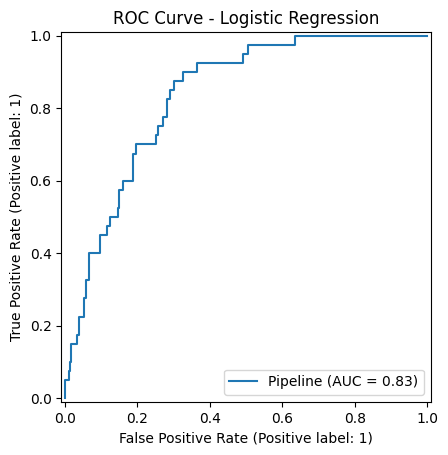

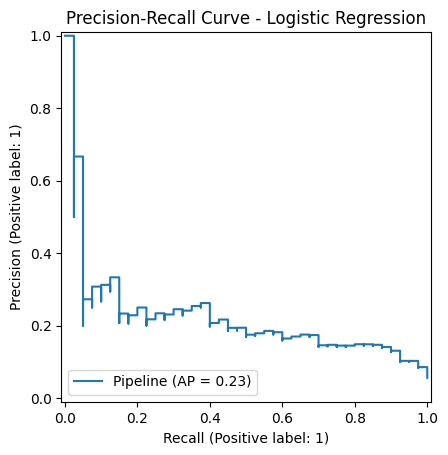

Top coefficients:
age                            1.416664
smoking_status_never smoked   -0.388184
work_type_children            -0.336738
gender_Male                   -0.319767
hypertension                   0.224788
Residence_type_Rural          -0.223150
ever_married_No               -0.185622
work_type_Private              0.182640
avg_glucose_level              0.172103
work_type_Govt_job            -0.166983
dtype: float64


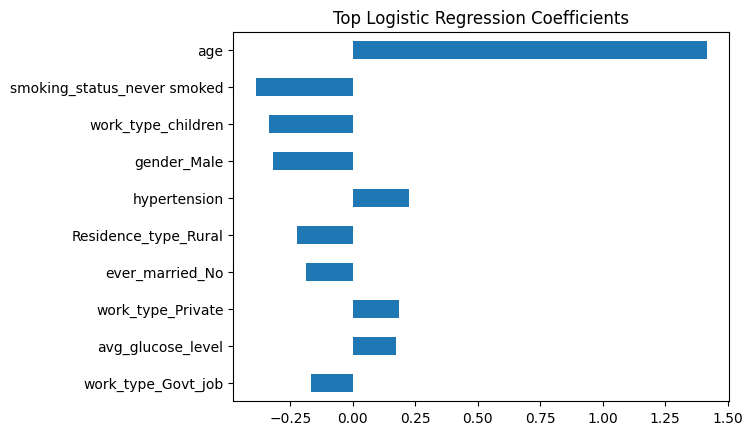

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df['bmi'] = df['bmi'].fillna(df.groupby('age')['bmi'].transform('median'))
df = df[df['smoking_status'] != 'Unknown']

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

num_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'))
])

logreg_pipeline.fit(X_train, y_train)

y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("")

# ROC Curve
RocCurveDisplay.from_estimator(logreg_pipeline, X_test, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(logreg_pipeline, X_test, y_test)
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

feature_names_num = num_cols
feature_names_cat = logreg_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_cols)
all_features = np.concatenate([feature_names_num, feature_names_cat])
coefs = logreg_pipeline.named_steps['classifier'].coef_[0]
coef_df = pd.Series(coefs, index=all_features).sort_values(key=abs, ascending=False)
print("Top coefficients:")
print(coef_df.head(10))

coef_df.head(10).plot(kind='barh')
plt.title('Top Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0     0.9440    1.0000    0.9712       674
           1     0.0000    0.0000    0.0000        40

    accuracy                         0.9440       714
   macro avg     0.4720    0.5000    0.4856       714
weighted avg     0.8911    0.9440    0.9168       714

Confusion Matrix:
 [[674   0]
 [ 40   0]]
ROC AUC Score: 0.7900408011869436


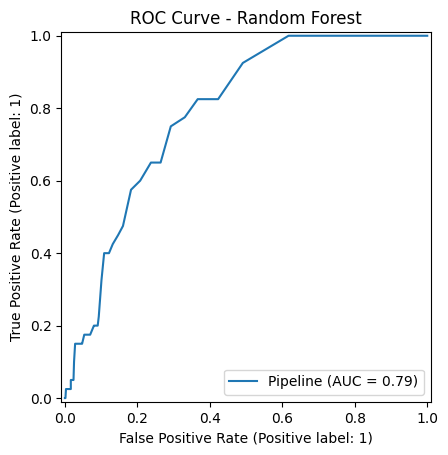

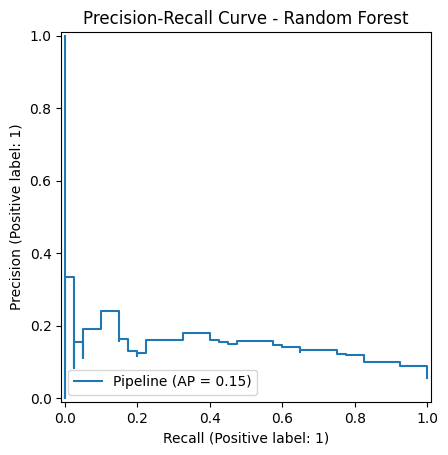

Top features:
age                            0.352920
avg_glucose_level              0.208685
bmi                            0.173499
hypertension                   0.040021
heart_disease                  0.024997
smoking_status_never smoked    0.021187
work_type_Self-employed        0.020273
work_type_Private              0.017437
Residence_type_Urban           0.016580
Residence_type_Rural           0.016375
dtype: float64


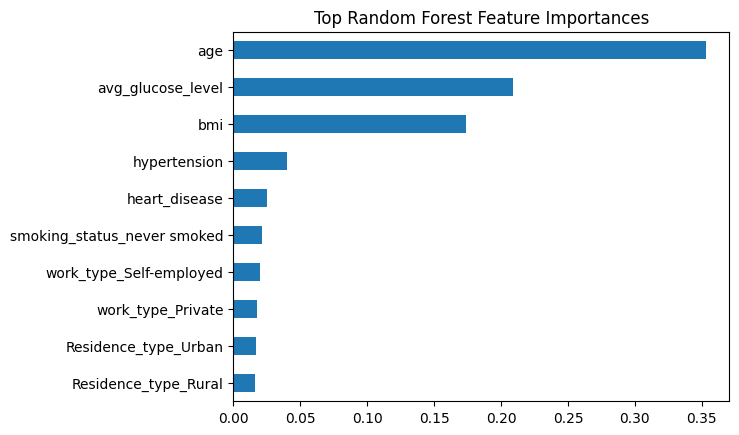

In [44]:
from sklearn.ensemble import RandomForestClassifier


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

PrecisionRecallDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

# Feature importance
all_features_rf = np.concatenate([feature_names_num, feature_names_cat])
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feat_imp_df = pd.Series(importances, index=all_features_rf).sort_values(ascending=False)
print("Top features:")
print(feat_imp_df.head(10))

feat_imp_df.head(10).plot(kind='barh')
plt.title('Top Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_test_df = X_test.copy()
X_test_df['gender'] = X.loc[X_test_df.index, 'gender']

pos_rate_female = np.mean(y_proba[X_test_df['gender'] == 'Female'])
pos_rate_male = np.mean(y_proba[X_test_df['gender'] == 'Male'])

print(f"Positive prediction rate Female: {pos_rate_female:.3f}")
print(f"Positive prediction rate Male: {pos_rate_male:.3f}")
print(f"Disparate Impact (Female / Male): {pos_rate_female / pos_rate_male:.3f}")


Positive prediction rate Female: 0.352
Positive prediction rate Male: 0.319
Disparate Impact (Female / Male): 1.103


The model provides a balanced rate of positive predictions between females and males, with a disparate impact of 1.1, which is well within acceptable fairness thresholds. There is no apparent unfair bias towards either gender in terms of positive stroke risk predictions.